**University of Science and Technology UST,  Zewail City**<br>
**CIE Program**<br>
**Computer Vision - CIE 552**<br>
**Lab Assignment #5 - Harris Corner Detection**<br>

**Student Name:** Elsayed Mohammed Elsayed Mostafa <br>
**Student ID:**   201700316

# Imports

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.signal import convolve2d, correlate2d
from typing import List
import cv2
from scipy.ndimage import correlate, convolve
import skimage
from skimage.feature import peak_local_max

# Helper Functions

In [ ]:
def show_images(images, titles):
    #This function is used to show image(s) with titles by sending an array of images and an array of associated titles.
    # images[0] will be drawn with the title titles[0] if exists
    # You aren't required to understand this function, use it as-is.
    assert len(images) == len(titles)
    images = [cv2.cvtColor(img, cv2.COLOR_BGR2RGB) for img in images]
    fig = plt.figure()
    n_ims = len(images)
    n = 1
    for image,title in zip(images,titles):
        a = fig.add_subplot(1,n_ims,n)
        if image.ndim == 2: 
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
        n += 1
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_ims)
    plt.show()

# Harris Detector Function

In [ ]:
def apply_harris(img, ksize= 3, k = 0.04, w_size = 4):
    assert w_size%2 == 0 #Even Window Size
    rows, cols = img.shape
    # Smoothing
    img = cv2.GaussianBlur(img,ksize=(ksize,ksize),sigmaX=1, sigmaY=1)
    # Sobel
    sobel_x = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
    sobel_y = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
    Ix = np.absolute(convolve2d(img, sobel_x, 'same'))
    Iy = np.absolute(convolve2d(img, sobel_y, 'same'))
    # Second Drev.
    Ixx = np.multiply(Ix,Ix)
    Iyy = np.multiply(Iy,Iy)
    Ixy = np.multiply(Ix,Iy)
    # Summations Over Windows
    Sxx = np.zeros((rows,cols))
    Syy = np.zeros((rows,cols))
    Sxy = np.zeros((rows,cols))
    R = np.zeros((rows,cols))
    s_size = int(w_size/2)
    for row in range(s_size, rows-w_size-1):
        for col in range(s_size, cols-w_size-1):
            Sxx[row,col] = np.sum(Ixx[row-s_size:row+s_size, col-s_size:col+s_size])
            Syy[row,col] = np.sum(Iyy[row-s_size:row+s_size, col-s_size:col+s_size])
            Sxy[row,col] = np.sum(Ixy[row-s_size:row+s_size, col-s_size:col+s_size])
            det = Sxx[row,col]*Syy[row,col] - Sxy[row,col]**2
            trace = Sxx[row,col]+Syy[row,col]
            R[row,col] = det - k*(trace**2)
    return R
    

# Main Task (Applying Harris Corner Detector)

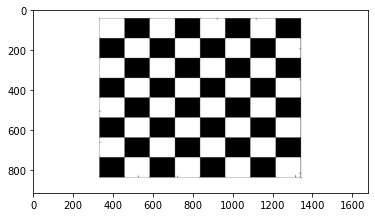

In [ ]:
# Speicify the image path (just the name if it is in the same directory as the notebook/script)
img_path = 'chess_board.jpg'
#img_path = 'NotreDame1.jpg'
# Read the image using openCV
original_img = cv2.imread(img_path)
img = cv2.cvtColor(original_img, cv2.COLOR_RGB2GRAY)
#img = cv2.resize(img, (300,300))
img = skimage.img_as_float32(img)
# Visualizing the image
plt.imshow(img, cmap='gray');

In [ ]:
# Use the function..
R = apply_harris(img) 

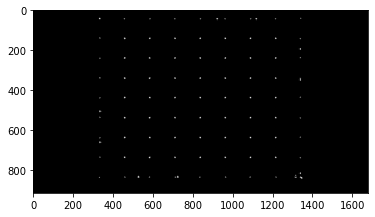

In [ ]:
thresh = 0.01*R.max()
ret, thresholded_image = cv2.threshold(R, thresh, 1.0, 0, cv2.THRESH_BINARY)
plt.imshow(thresholded_image, cmap='gray');

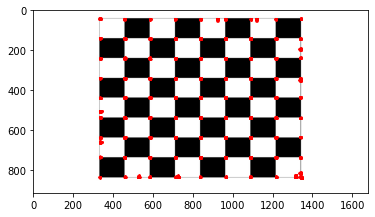

In [ ]:
plt.imshow(original_img);
p_image = peak_local_max(thresholded_image, min_distance = 20)
Xs = p_image[:,1]
Ys = p_image[:,0]
plt.scatter(Xs,Ys,c='r', s=2);